# 1)Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# 2)Loading the Dataset

In [4]:

df = pd.read_csv(r'C:\Users\akula\OneDrive\Desktop\data science internship Code clause\Pedicting House prices\Dataset.csv')


print(df.head())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [5]:
for index,row in df.iterrows():
    print(f'Row{index} : {row.to_dict()}')

Row0 : {'id': 6762810635.0, 'Date': 42491.0, 'number of bedrooms': 4.0, 'number of bathrooms': 2.5, 'living area': 2920.0, 'lot area': 4000.0, 'number of floors': 1.5, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 5.0, 'grade of the house': 8.0, 'Area of the house(excluding basement)': 1910.0, 'Area of the basement': 1010.0, 'Built Year': 1909.0, 'Renovation Year': 0.0, 'Postal Code': 122004.0, 'Lattitude': 52.8878, 'Longitude': -114.47, 'living_area_renov': 2470.0, 'lot_area_renov': 4000.0, 'Number of schools nearby': 2.0, 'Distance from the airport': 51.0, 'Price': 1400000.0}
Row1 : {'id': 6762810998.0, 'Date': 42491.0, 'number of bedrooms': 5.0, 'number of bathrooms': 2.75, 'living area': 2910.0, 'lot area': 9480.0, 'number of floors': 1.5, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 3.0, 'grade of the house': 8.0, 'Area of the house(excluding basement)': 2910.0, 'Area of the basement': 0.0, 'Built Year': 1939.0, 'Renov

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Row10550 : {'id': 6762825019.0, 'Date': 42655.0, 'number of bedrooms': 4.0, 'number of bathrooms': 2.5, 'living area': 2632.0, 'lot area': 4117.0, 'number of floors': 2.0, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 3.0, 'grade of the house': 8.0, 'Area of the house(excluding basement)': 2632.0, 'Area of the basement': 0.0, 'Built Year': 2013.0, 'Renovation Year': 0.0, 'Postal Code': 122039.0, 'Lattitude': 52.5728, 'Longitude': -114.468, 'living_area_renov': 2040.0, 'lot_area_renov': 5195.0, 'Number of schools nearby': 3.0, 'Distance from the airport': 80.0, 'Price': 349950.0}
Row10551 : {'id': 6762825171.0, 'Date': 42655.0, 'number of bedrooms': 1.0, 'number of bathrooms': 1.0, 'living area': 540.0, 'lot area': 10125.0, 'number of floors': 1.0, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 3.0, 'grade of the house': 5.0, 'Area of the house(excluding basement)': 540.0, 'Area of the basement': 0.0, 'Built Year': 1961.0, 'Re

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Row13553 : {'id': 6762827801.0, 'Date': 42709.0, 'number of bedrooms': 2.0, 'number of bathrooms': 1.0, 'living area': 720.0, 'lot area': 6400.0, 'number of floors': 1.0, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 4.0, 'grade of the house': 6.0, 'Area of the house(excluding basement)': 720.0, 'Area of the basement': 0.0, 'Built Year': 1943.0, 'Renovation Year': 0.0, 'Postal Code': 122064.0, 'Lattitude': 52.7586, 'Longitude': -114.558, 'living_area_renov': 1030.0, 'lot_area_renov': 6400.0, 'Number of schools nearby': 1.0, 'Distance from the airport': 70.0, 'Price': 285000.0}
Row13554 : {'id': 6762812554.0, 'Date': 42710.0, 'number of bedrooms': 3.0, 'number of bathrooms': 2.5, 'living area': 3560.0, 'lot area': 11448.0, 'number of floors': 2.0, 'waterfront present': 0.0, 'number of views': 0.0, 'condition of the house': 3.0, 'grade of the house': 11.0, 'Area of the house(excluding basement)': 3560.0, 'Area of the basement': 0.0, 'Built Year': 1997.0, 'R

# 3) Data PreProcessing

In [10]:

features = df[['number of bedrooms', 'living area', 'number of bathrooms', 
               'lot area', 'condition of the house', 
               'Number of schools nearby', 'Distance from the airport']]
target = df['Price']
# checks for missing values
print("Missing Values:\n", df.isnull().sum())



Missing Values:
 id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                

In [12]:
print(df.dropna(axis=1))


               id   Date  number of bedrooms  number of bathrooms  \
0      6762810635  42491                   4                 2.50   
1      6762810998  42491                   5                 2.75   
2      6762812605  42491                   4                 2.50   
3      6762812919  42491                   3                 2.00   
4      6762813105  42491                   3                 2.50   
...           ...    ...                 ...                  ...   
14614  6762830250  42734                   2                 1.50   
14615  6762830339  42734                   3                 2.00   
14616  6762830618  42734                   2                 1.00   
14617  6762830709  42734                   4                 1.00   
14618  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             2920      4000               1.5                   0   
1             2910      9480   

# 4) Splitting the Data into Training and Testing Sets

In [15]:

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 11695 samples
Testing set size: 2924 samples


# 5) Training the Linear Regression Model



In [18]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a more complex model 
model = RandomForestRegressor(random_state=42)
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_






Fitting 5 folds for each of 108 candidates, totalling 540 fits


# 6) Making Predictions

In [20]:
y_pred = best_model.predict(X_test_scaled)
print("Sample Predictions:", y_pred[:5])

Sample Predictions: [513012.9259764  563941.09058364 366580.03930726 457734.69674506
 762917.10745237]


In [21]:
# making the predictions for the whole dataset
for i, prediction in enumerate(y_pred):
    print(f"Row {i+1}: {prediction}")



Row 1: 513012.92597640347
Row 2: 563941.0905836383
Row 3: 366580.0393072602
Row 4: 457734.69674506027
Row 5: 762917.1074523659
Row 6: 287022.77770803694
Row 7: 317527.9106275818
Row 8: 1507433.9351722067
Row 9: 838766.0051483994
Row 10: 802636.2517943706
Row 11: 704449.3302883279
Row 12: 216115.39266020895
Row 13: 787304.7615507167
Row 14: 253480.06963270693
Row 15: 528781.2715992791
Row 16: 605848.6656270978
Row 17: 345373.50727282075
Row 18: 474866.97396124643
Row 19: 306456.3127721846
Row 20: 423357.09772821545
Row 21: 353876.5104894961
Row 22: 430854.70350685966
Row 23: 673133.5361095094
Row 24: 803418.9314320574
Row 25: 637463.0826936535
Row 26: 322056.9999642692
Row 27: 548748.795394335
Row 28: 272042.91032333684
Row 29: 1110486.7596462576
Row 30: 331993.78284244705
Row 31: 323290.7539832555
Row 32: 618158.6304845018
Row 33: 801976.8242436447
Row 34: 416187.1899415796
Row 35: 697444.5786869904
Row 36: 493968.29313801427
Row 37: 422333.1577654826
Row 38: 265089.68258239573
Row 39:

# 7) Evaluating Model Performance

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Mean Absolute Error: 148434.62
Mean Squared Error: 55221041254.26
Root Mean Squared Error: 234991.58
R² Score: 0.63
Feature Importances:
                     Feature  Importance
1                living area    0.797009
3                   lot area    0.084696
2        number of bathrooms    0.034178
6  Distance from the airport    0.029371
4     condition of the house    0.028175
0         number of bedrooms    0.019279
5   Number of schools nearby    0.007292


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 9) Evaluating Results

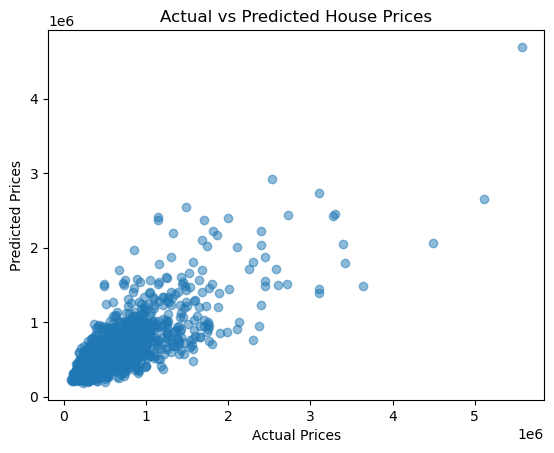

In [29]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
